# Telemarketing bank campaign 
In this notebook you will find a classsification project using a telemarketing bank campaing in order to understand whether an existing client is willing to suscribe to a bank term deposit.

# 0. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Loading data

In [2]:
dataset = pd.read_csv('~data/bank-data.csv')
# Visualise the first 15 entries of the dataset
dataset.head(15)

,Unnamed: 0,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
0,1,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,3,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,4,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,5,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,6,42,management,single,tertiary,no,NaN,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,7,56,management,married,tertiary,no,830.0,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,8,60,retired,divorced,secondary,no,545.0,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,9,37,technician,married,secondary,no,NaN,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,10,28,services,single,secondary,no,5090.0,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
dataset.describe()

,Unnamed: 0,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
count,11162.000000,11162.000000,9475.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5581.500000,41.231948,1824.106385,15.658036,371.993818,2.508421,51.330407,0.832557
std,3222.336187,11.913369,3414.744888,8.420740,347.128386,2.722077,108.758282,2.292007
min,1.000000,18.000000,10.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2791.250000,32.000000,282.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,5581.500000,39.000000,771.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,8371.750000,49.000000,2071.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,11162.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
Unnamed: 0                        11162 non-null int64
age                               11162 non-null int64
job                               11162 non-null object
maritalStatus                     11162 non-null object
education                         11162 non-null object
defaultedCredit                   11162 non-null object
balance                           9475 non-null float64
housingLoan                       11162 non-null object
personalLoan                      11162 non-null object
contactType                       11162 non-null object
day_of_month                      11162 non-null int64
month                             11162 non-null object
callDuration                      11162 non-null int64
numberTimesContactedInCampaign    11162 non-null int64
daysSinceLastContact              11162 non-null int64
totalTimesContacted               11162 non-null int64
ou

In [5]:
dataset.shape

(11162, 18)

In [6]:
dataset.subscribed.describe()

count     11162
unique        2
top          no
freq       5873
Name: subscribed, dtype: object

In [7]:
dataset = dataset.drop(columns = "Unnamed: 0")

# 2. Data cleaning

In this part we are going to check the quality of the data and clean the data if necesary

In [8]:
dataset = dataset.dropna()
dataset.describe()

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
count,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000
mean,41.284433,1824.106385,15.558100,373.589974,2.459208,53.755251,0.881794
std,12.129806,3414.744888,8.395232,346.923923,2.618663,110.447887,2.373007
min,18.000000,10.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,282.000000,8.000000,140.000000,1.000000,-1.000000,0.000000
50%,39.000000,771.000000,15.000000,258.000000,2.000000,-1.000000,0.000000
75%,49.000000,2071.000000,21.000000,493.000000,3.000000,85.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# 3. Age considerations
In this part we are going to check the particular variable `age` to see if there are interesting patterns to keep in mind.

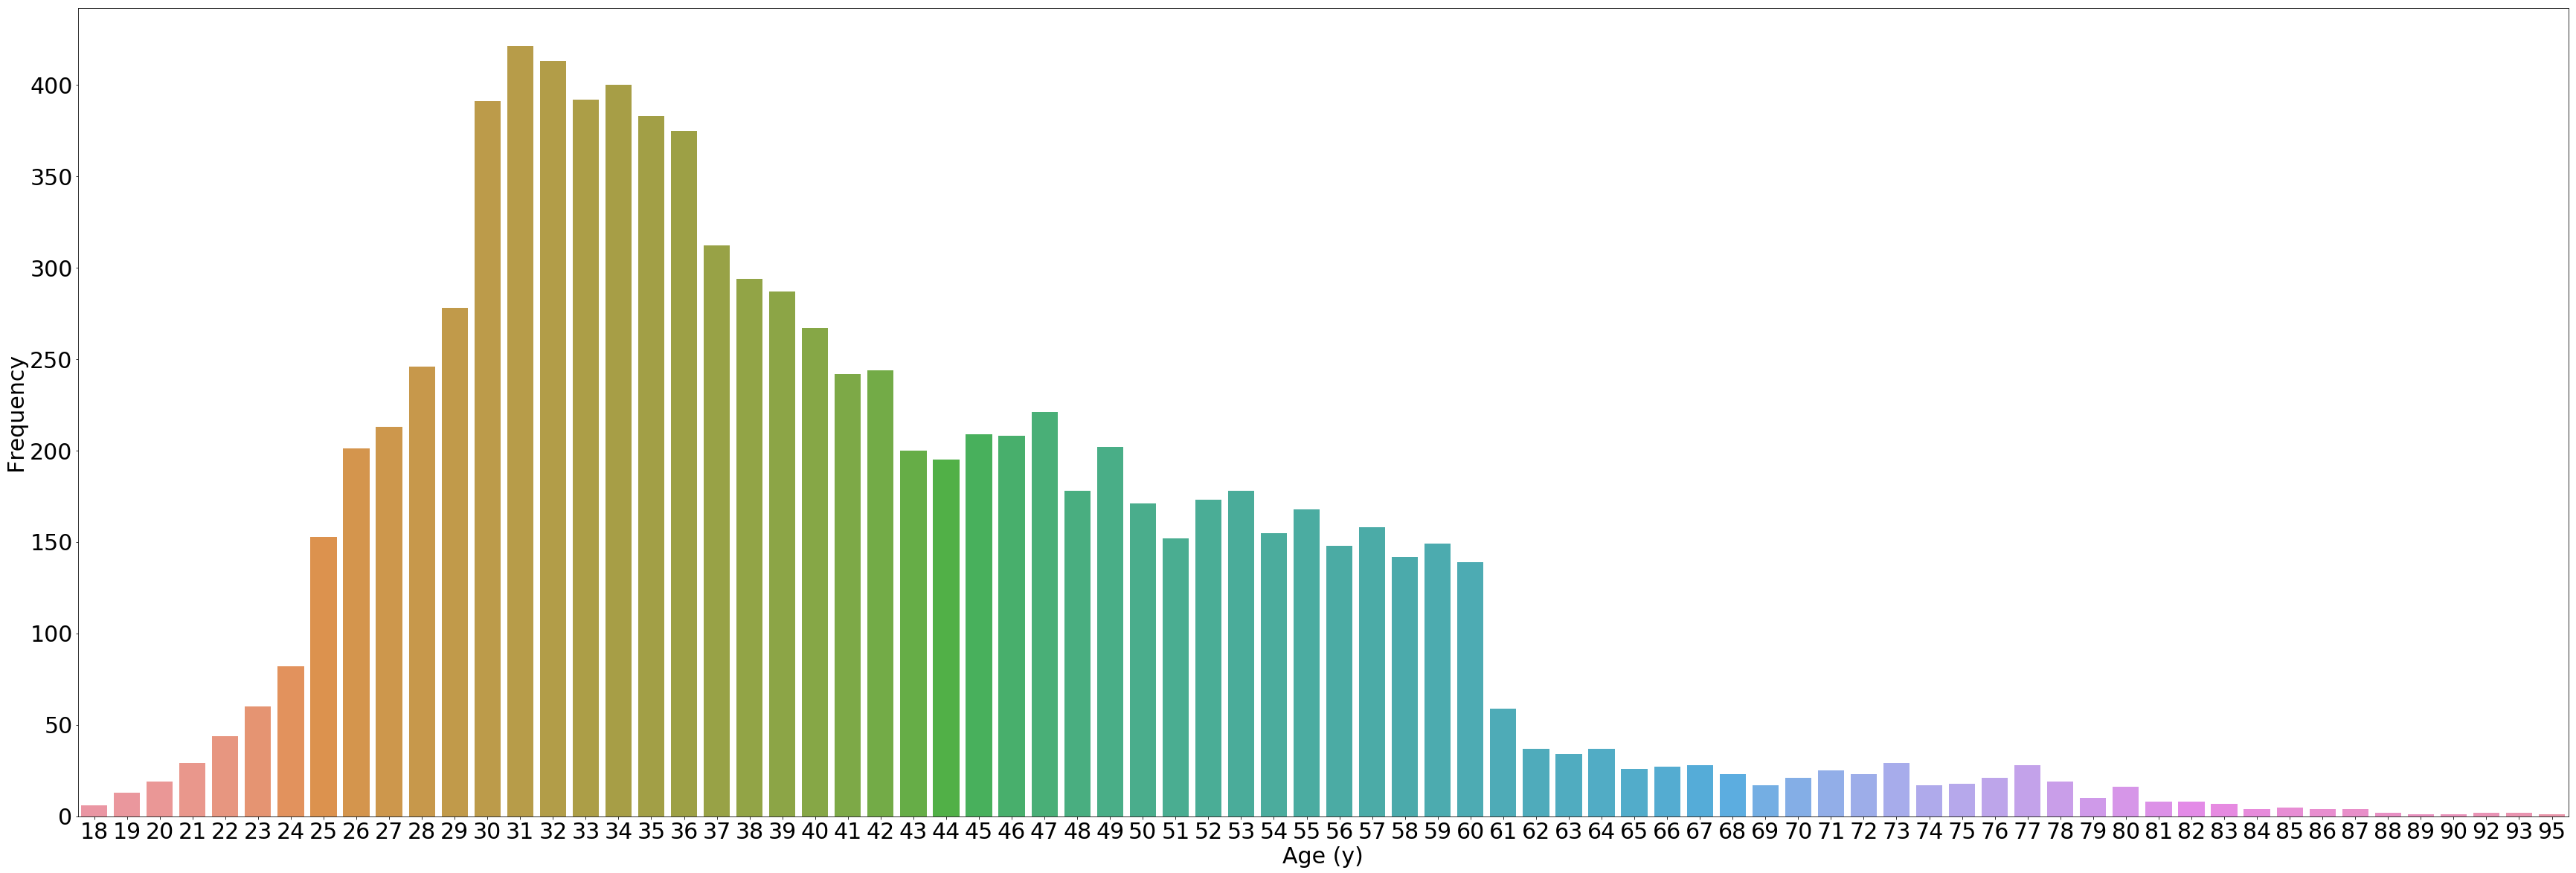

In [9]:
# The Fig1 is a bar plot of age

fig1 = sns.countplot(x='age', data=dataset)
fig1.figure.set_size_inches(60,20)
fig1.set_xlabel("Age (y)", fontsize=30)
fig1.set_ylabel("Frequency", fontsize=30)
fig1.tick_params(labelsize = 30)
plt.show()

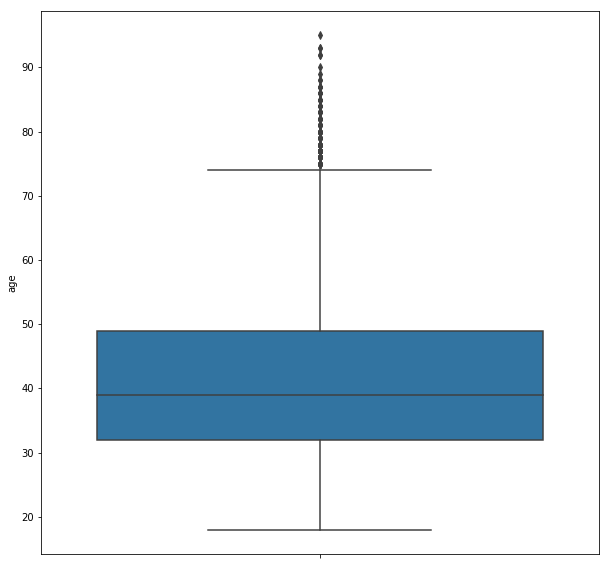

In [10]:
# the fig2 is a boxplot to see the variation of age
fig2 = sns.boxplot(y='age', data=dataset, )
fig2.figure.set_size_inches(10,10)
plt.show()

# 4. Graphical analysis
In this section we are going to explore graphically the variables with respect of whether the telemarketing campaing was succesful or not.

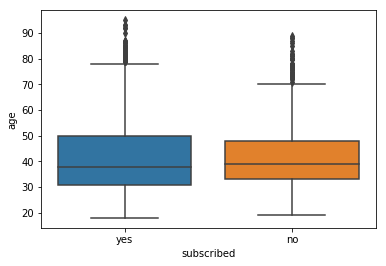

In [11]:
#Box plot of age based on whether the telecampaing was succesful or not
sns.boxplot(y='age', x ='subscribed', data=dataset)
plt.show()

In [12]:
# subset of the dataset consifering people younger than 60
younger = dataset[dataset['age'] < 60]

In [13]:
#Checking that the maximum age is 59
younger.describe()

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
count,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000,8772.000000
mean,39.130643,1728.028842,15.599293,372.937642,2.492248,52.692544,0.846671
std,9.574688,3040.439648,8.397562,350.600265,2.674030,110.682158,2.363375
min,18.000000,10.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,270.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,37.000000,726.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,47.000000,1954.000000,21.000000,496.000000,3.000000,59.250000,1.000000
max,59.000000,66653.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


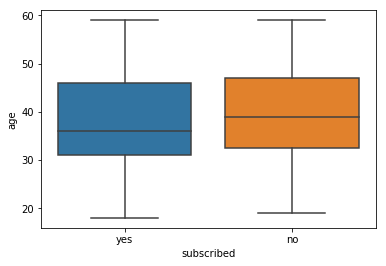

In [14]:
#Box plot of age based on whether the telecampaing was succesful or not; only for people younger than 60
sns.boxplot(y='age', x ='subscribed', data=younger)
plt.show()

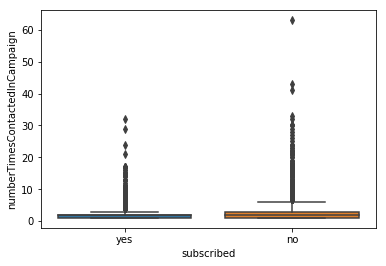

In [15]:
#the relationship between number of calls and the subscription outcome
sns.boxplot(y='numberTimesContactedInCampaign', x ='subscribed', data=dataset)
plt.show()

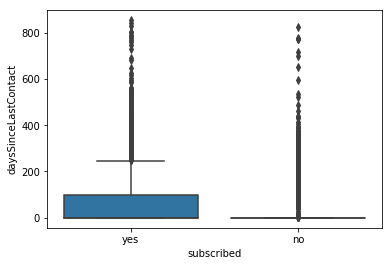

In [16]:
#the relationship between number of days since the last contact and the subscription outcome
sns.boxplot(y='daysSinceLastContact', x ='subscribed', data=dataset)
plt.show()

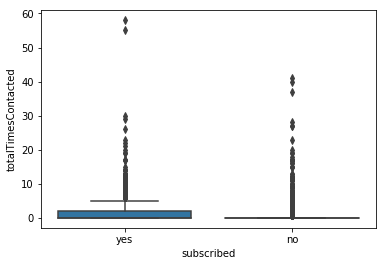

In [17]:
#the relationship between total times contacted and the subscription outcome
sns.boxplot(y='totalTimesContacted', x ='subscribed', data=dataset)
plt.show()

## Bar plots

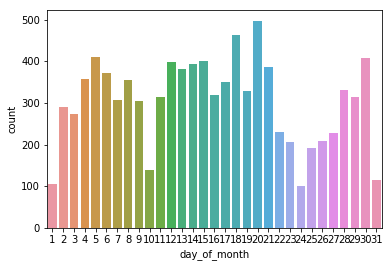

In [18]:
sns.countplot(x='day_of_month',data=dataset)
plt.show()

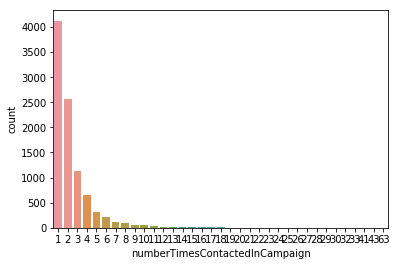

In [19]:
sns.countplot(x='numberTimesContactedInCampaign',data=dataset)
plt.show()

## Tabulated Analysis
In this part we are going to check some crosstable results to see if there any obvious pattern

In [20]:
#differences in subscription rates and different jobs
pd.crosstab(dataset['job'], dataset['subscribed'])

subscribed,no,yes
job,,
admin.,569,560
blue-collar,981,603
entrepreneur,170,97
housemaid,137,98
management,1024,1186
retired,222,473
self-employed,182,163
services,453,308
student,83,254


In [21]:
#differences in subscription rates and marital status
pd.crosstab(dataset['maritalStatus'], dataset['subscribed'])

subscribed,no,yes
maritalStatus,,
divorced,510,512
married,2902,2455
single,1363,1733


In [22]:
#differences in subscription rates and education
pd.crosstab(dataset['education'], dataset['subscribed'])

subscribed,no,yes
education,,
primary,718,520
secondary,2459,2151
tertiary,1392,1787
unknown,206,242


In [23]:
#differences in subscription rates and housing loan
pd.crosstab(dataset['housingLoan'], dataset['subscribed'])

subscribed,no,yes
housingLoan,,
no,2083,3074
yes,2692,1626


## Tabulated Graphical Analysis
In this part we are going to check some crosstable graphical results to see if there any obvious pattern

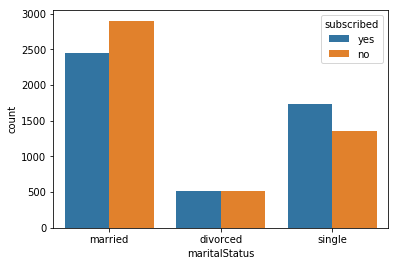

In [24]:
sns.countplot( x='maritalStatus', hue= 'subscribed', data= dataset)
plt.show()

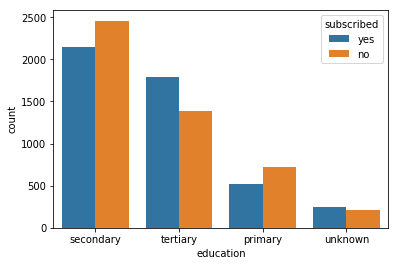

In [25]:
sns.countplot( x ='education', hue= 'subscribed', data= dataset)
plt.show()

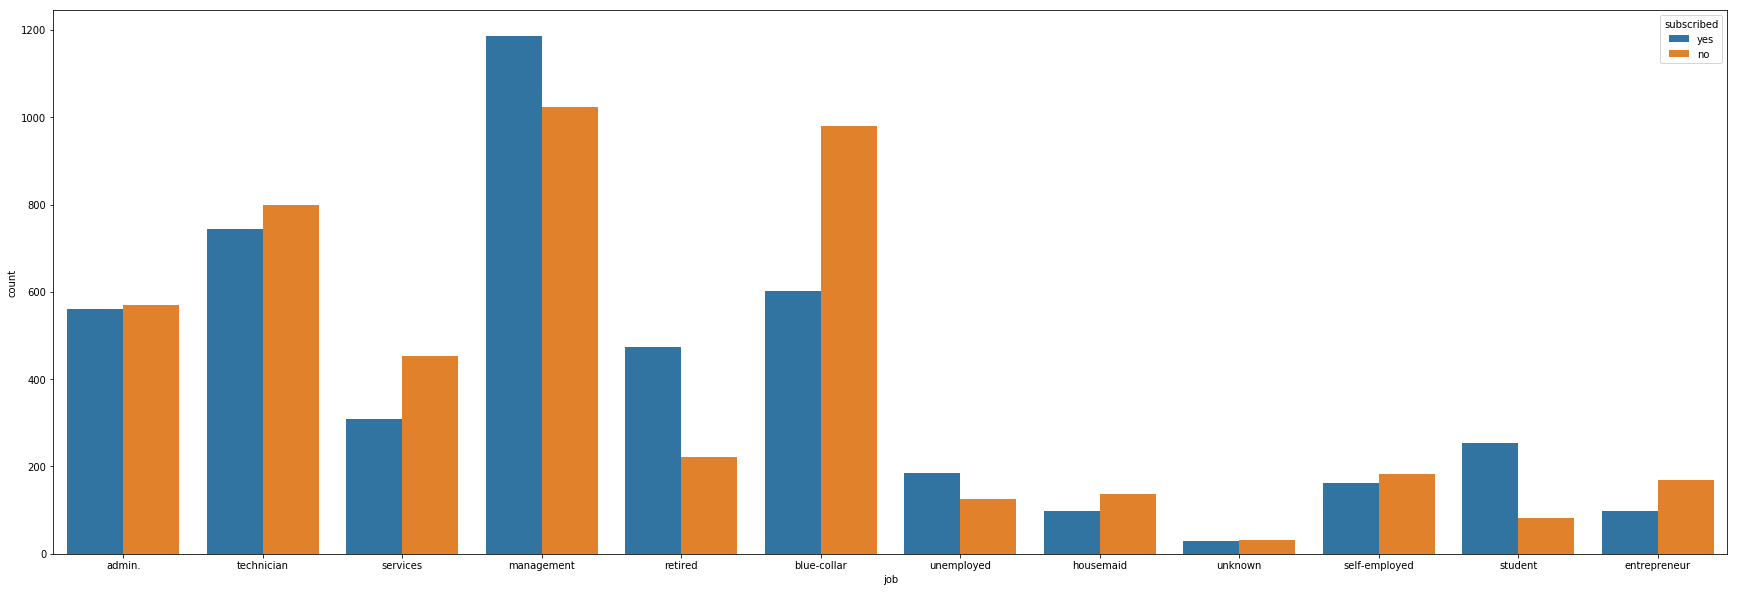

In [26]:
fig3 = sns.countplot( x='job', hue= 'subscribed', data= dataset)
fig3.figure.set_size_inches(30,10)
plt.show()

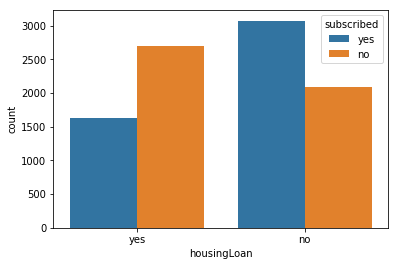

In [27]:
sns.countplot( x ='housingLoan', hue= 'subscribed', data= dataset)
plt.show()

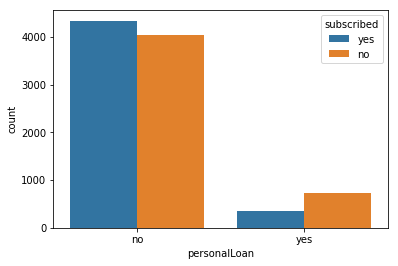

In [28]:
sns.countplot( x ='personalLoan', hue= 'subscribed', data= dataset)
plt.show()

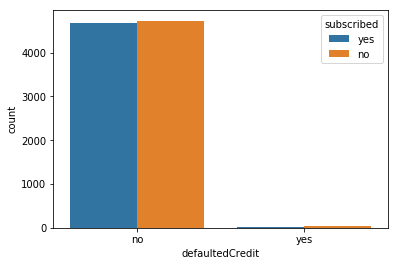

In [29]:
sns.countplot( x ='defaultedCredit', hue= 'subscribed', data= dataset)
plt.show()

# 5. Correlation analysis
In this part we are going to evaluate how strong and significant is the correlation between variables

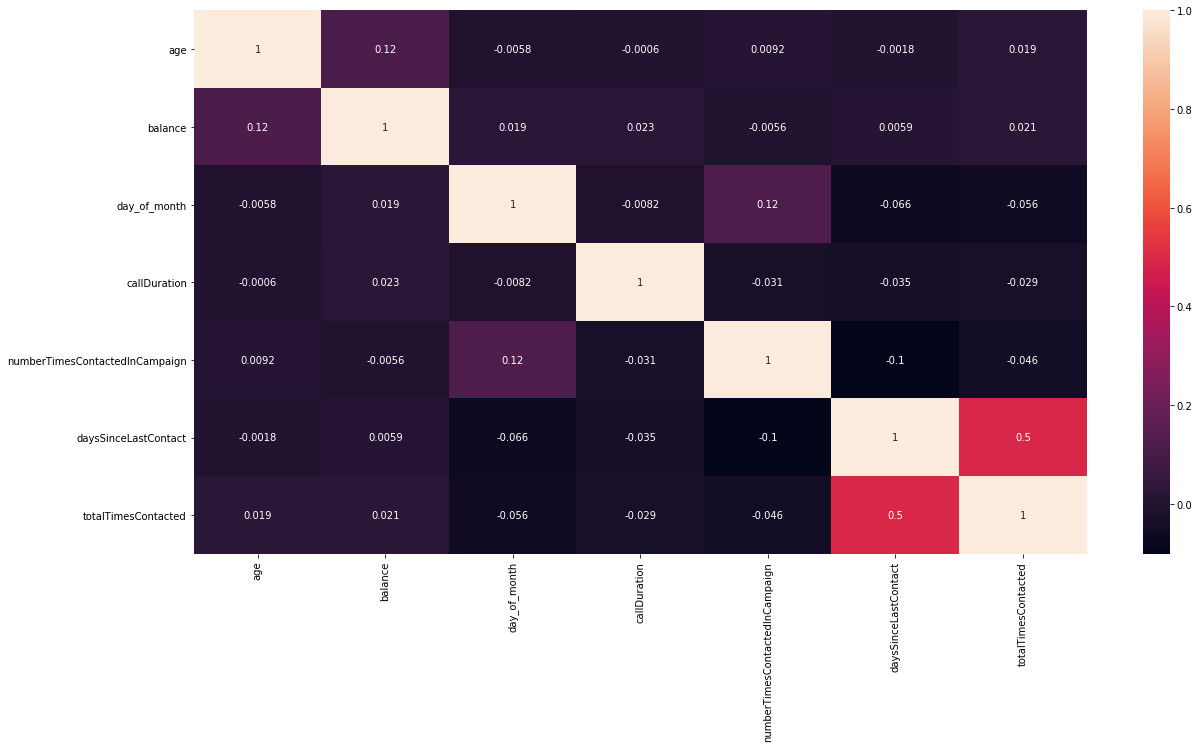

In [30]:
# One part is checking the correlation of numerical variables to do that we can use the function`.heatmap` from `sns` library
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr(),  annot=True)

### Dummy variables
Sometimes to evaluate the correlartion of categorical variables it is necessary to create dummy variables. One for each level of a categorical variable.

In [31]:
#New data set with dummy variables
cor_data = pd.get_dummies(dataset)
cor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 11159
Data columns (total 53 columns):
age                               9475 non-null int64
balance                           9475 non-null float64
day_of_month                      9475 non-null int64
callDuration                      9475 non-null int64
numberTimesContactedInCampaign    9475 non-null int64
daysSinceLastContact              9475 non-null int64
totalTimesContacted               9475 non-null int64
job_admin.                        9475 non-null uint8
job_blue-collar                   9475 non-null uint8
job_entrepreneur                  9475 non-null uint8
job_housemaid                     9475 non-null uint8
job_management                    9475 non-null uint8
job_retired                       9475 non-null uint8
job_self-employed                 9475 non-null uint8
job_services                      9475 non-null uint8
job_student                       9475 non-null uint8
job_technician            

## Correlation matrix
We can calculate the correlation coefficient usinf the function `.corr` 

In [32]:
cor_matrix = cor_data.corr()

This matrix is huge! Therefore a better way to see the entire picture is literally ploting the matrix using a `sns.heatmap`

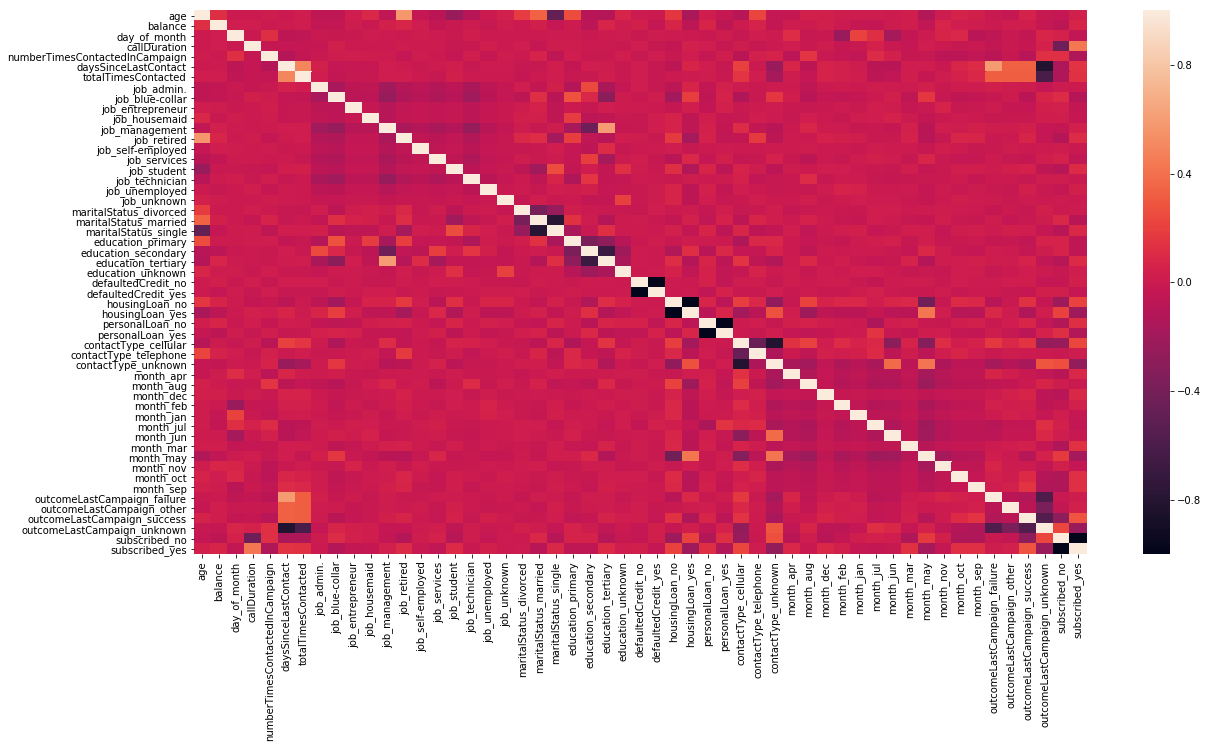

In [33]:
plt.figure(figsize=(20, 10))
sns.heatmap(cor_matrix)

## Calculating _r_-coefficients and *p*-values

Let's load the library researchpy which will help a lot in our analysis, in particular the function `.corr_case` and `corr.pair`

In [34]:
import researchpy as rp
corr_type, corr_matrix, corr_ps = rp.corr_case(cor_data)

The function `.corr_case` generates three matrixes, one about the type of correlation, the second matrix shows the *r* coefficient and the last matrix shows the _p_-value of the correlation

In [35]:
corr_ps.head(3)

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed_no,subscribed_yes
age,0.0000,0.0000,0.5748,0.9533,0.3730,0.8579,0.0582,0.0000,0.0000,0.0308,...,0.0000,0.1321,0.0000,0.0003,0.3008,0.0090,0.0000,0.0527,0.0015,0.0015
balance,0.0000,0.0000,0.0673,0.0285,0.5836,0.5637,0.0447,0.0000,0.0001,0.3057,...,0.0000,0.0000,0.0293,0.1462,0.6679,0.0129,0.0042,0.0037,0.0000,0.0000
day_of_month,0.5748,0.0673,0.0000,0.4247,0.0000,0.0000,0.0000,0.2570,0.1132,0.2579,...,0.8667,0.0000,0.0000,0.0000,0.0000,0.1996,0.0001,0.0000,0.0000,0.0000


The function `.corr_pair` generates one matrix, where it shows for each pair of variables the *r* coefficient and the _p_-value of the correlation 

With that outcome it is possible to check how many correlations are very high (*r* coefficient higher than 0.5 or lower than -0.5) and significant (_p_-value lower than 0.05)

In [36]:
corr_table = rp.corr_pair(cor_data)

In [37]:
corr_table.head(3)

,r value,p-value,N
age & balance,0.1202,0.0000,9475
age & day_of_month,-0.0058,0.5748,9475
age & callDuration,-0.0006,0.9533,9475


In [38]:
# The r value and p-value are not numeric values!
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, age & balance to subscribed_no & subscribed_yes
Data columns (total 3 columns):
r value    1378 non-null object
p-value    1378 non-null object
N          1378 non-null int64
dtypes: int64(1), object(2)
memory usage: 83.1+ KB


In [39]:
# usiong pd.to_numeric we can solve the problem
corr_table['p-value']= pd.to_numeric(corr_table['p-value'])
corr_table['r value']= pd.to_numeric(corr_table['r value'])

In [40]:
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, age & balance to subscribed_no & subscribed_yes
Data columns (total 3 columns):
r value    1378 non-null float64
p-value    1378 non-null float64
N          1378 non-null int64
dtypes: float64(2), int64(1)
memory usage: 83.1+ KB


In [41]:
corr_table.head(2)

,r value,p-value,N
age & balance,0.1202,0.0000,9475
age & day_of_month,-0.0058,0.5748,9475


In [42]:
corr_table[(corr_table['r value'] > 0.5)]

,r value,p-value,N
age & job_retired,0.5703,0.0,9475
daysSinceLastContact & outcomeLastCampaign_failure,0.5900,0.0,9475
job_management & education_tertiary,0.5965,0.0,9475


In [43]:
corr_table[(corr_table['r value']  < -0.5)]

,r value,p-value,N
daysSinceLastContact & outcomeLastCampaign_unknown,-0.8164,0.0,9475
totalTimesContacted & outcomeLastCampaign_unknown,-0.6121,0.0,9475
maritalStatus_married & maritalStatus_single,-0.7946,0.0,9475
education_secondary & education_tertiary,-0.6917,0.0,9475
defaultedCredit_no & defaultedCredit_yes,-1.0000,0.0,9475
housingLoan_no & housingLoan_yes,-1.0000,0.0,9475
personalLoan_no & personalLoan_yes,-1.0000,0.0,9475
contactType_cellular & contactType_unknown,-0.8169,0.0,9475
outcomeLastCampaign_failure & outcomeLastCampaign_unknown,-0.5889,0.0,9475
outcomeLastCampaign_success & outcomeLastCampaign_unknown,-0.5670,0.0,9475


# 6. Classification model

### Spliting the data

In [44]:
# Feature selection 
feature_cols = ['age', 'balance', 'day_of_month', 'callDuration',
       'numberTimesContactedInCampaign', 'daysSinceLastContact',
       'totalTimesContacted', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'maritalStatus_divorced',
       'maritalStatus_married', 'maritalStatus_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'defaultedCredit_no', 'defaultedCredit_yes', 'housingLoan_no',
       'housingLoan_yes', 'personalLoan_no', 'personalLoan_yes',
       'contactType_cellular', 'contactType_telephone', 'contactType_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'outcomeLastCampaign_failure',
       'outcomeLastCampaign_other', 'outcomeLastCampaign_success',
       'outcomeLastCampaign_unknown']
X = cor_data[feature_cols]
y = dataset.subscribed
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

## Set up the model and train the model
In this step we are going to set up the model with 500 trees, using entropy as the parameter to find the optimal tree and with a maximum depth of 5 nodes.
Then we are going to train the model using the function `.fit`

In [45]:
clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [46]:
#Classify the test subset using .predict()
y_pred = clf.predict(X_test)

In [47]:
#Calculate the accuracy using metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.805403123680878


Text(91.68, 0.5, 'predicted values')

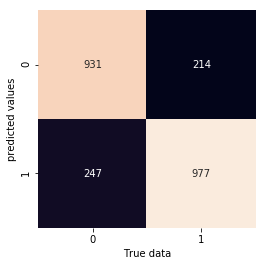

In [48]:
# y_test is a dataframe and to use the function confusion_matrix it is necessary to convert y_test to a list
from sklearn.metrics import confusion_matrix
y_true = y_test.tolist()
mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True data')
plt.ylabel('predicted values')

Let's check which variables are the most important to classify the dataset

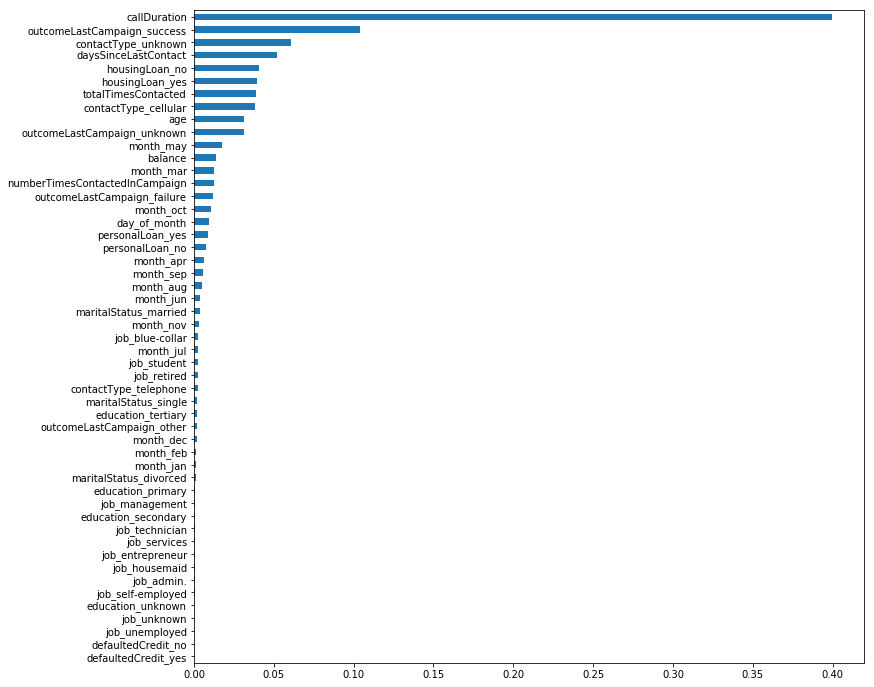

In [49]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))

You can also visualise the individual trees as we did in the workshop. Each tree represents a subset of the model. In this particular case we are interested in a single tree, the tree numer 90 but you can explore from the tree 0 to the the tree 499!

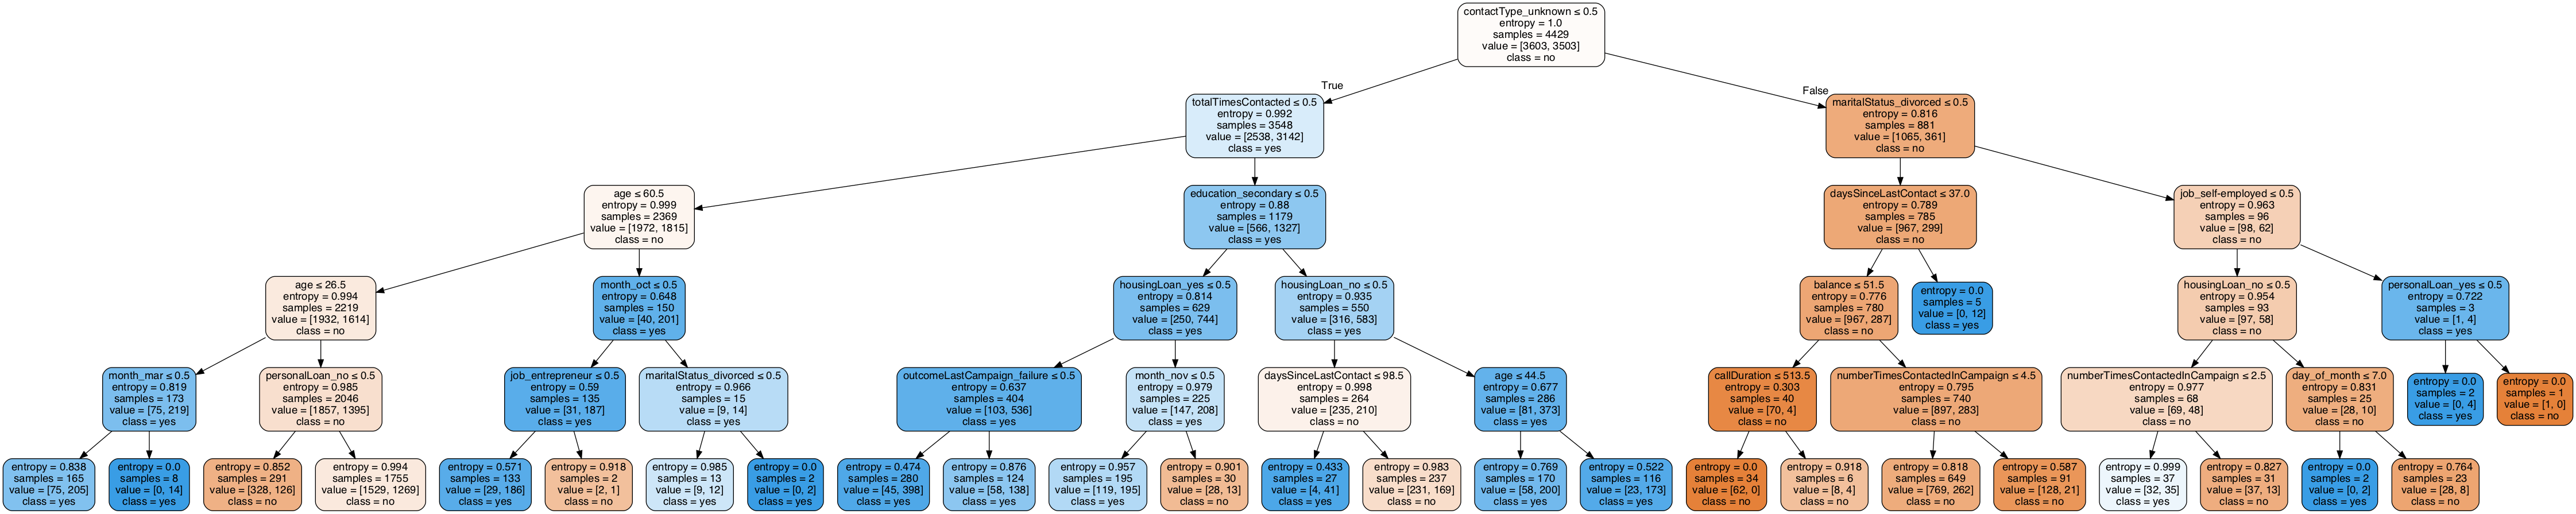

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
estimator = clf.estimators_[90]
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())